In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [47]:
df=pd.read_csv("bengaluru_house_prices.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [48]:
df.drop(columns=['availability','society','area_type','balcony'],inplace=True)

In [49]:
df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [50]:
df.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [51]:
df.dropna(inplace=True)
df.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [52]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [53]:
df['bhk']=df['size'].apply(lambda x: int(x.split(" ")[0]))
df.drop(columns=['size'],inplace=True)
df

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5
13316,Richards Town,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Padmanabhanagar,4689,4.0,488.00,4


In [54]:
df['total_sqft'].unique()
#we will have to convert ranges to float 

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [55]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [56]:
df[~df['total_sqft'].apply(is_float)]

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,38.190,2
12990,Talaghattapura,1804 - 2273,3.0,122.000,3
13059,Harlur,1200 - 1470,2.0,72.760,2
13265,Hoodi,1133 - 1384,2.0,59.135,2


In [57]:
def to_float(x):
    range= x.split('-')
    if len(range)==2:
        return (float(range[0])+float(range[1]))/2

    try:
        return float(x)
    except:
        return None 

In [58]:
to_float('5124')

5124.0

In [59]:
to_float("100-200")

150.0

In [60]:
df['total area']=df['total_sqft'].apply(to_float)
df.drop(columns=['total_sqft'],inplace=True)
df

,location,bath,price,bhk,total area
0,Electronic City Phase II,2.0,39.07,2,1056.0
1,Chikka Tirupathi,5.0,120.00,4,2600.0
2,Uttarahalli,2.0,62.00,3,1440.0
3,Lingadheeranahalli,3.0,95.00,3,1521.0
4,Kothanur,2.0,51.00,2,1200.0
...,...,...,...,...,...
13315,Whitefield,4.0,231.00,5,3453.0
13316,Richards Town,5.0,400.00,4,3600.0
13317,Raja Rajeshwari Nagar,2.0,60.00,2,1141.0
13318,Padmanabhanagar,4.0,488.00,4,4689.0


In [61]:
#calculating price per square feet

df['price_per_sqft']=df['price']*100000/df['total area']
df

,location,bath,price,bhk,total area,price_per_sqft
0,Electronic City Phase II,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2.0,51.00,2,1200.0,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,4.0,231.00,5,3453.0,6689.834926
13316,Richards Town,5.0,400.00,4,3600.0,11111.111111
13317,Raja Rajeshwari Nagar,2.0,60.00,2,1141.0,5258.545136
13318,Padmanabhanagar,4.0,488.00,4,4689.0,10407.336319


In [62]:
len(df['location'].unique())

1304

In [63]:
#strip function removes extra spaces from starting and ending of the string
df['location']=df['location'].apply(lambda x: x.strip(" "))

loc_stats=df['location'].value_counts()
loc_stats

location
Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: count, Length: 1293, dtype: int64

In [64]:
loc_stats_under_10=loc_stats[loc_stats<=10]
loc_stats_under_10

location
Naganathapura                     10
Sadashiva Nagar                   10
Nagappa Reddy Layout              10
BTM 1st Stage                     10
Sector 1 HSR Layout               10
                                  ..
Vasantapura main road              1
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Abshot Layout                      1
Name: count, Length: 1052, dtype: int64

In [65]:
df.location=df.location.apply(lambda x: "other" if x in loc_stats_under_10 else x)
len(df['location'].unique())
df['location'].value_counts()

location
other                 2881
Whitefield             535
Sarjapur  Road         392
Electronic City        304
Kanakpura Road         266
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: count, Length: 242, dtype: int64

In [66]:
#finding entries where bedroom is less than 300

df[df['total area']/df['bhk']<300]

,location,bath,price,bhk,total area,price_per_sqft
9,other,6.0,370.0,6,1020.0,36274.509804
45,HSR Layout,9.0,200.0,8,600.0,33333.333333
58,Murugeshpalya,4.0,150.0,6,1407.0,10660.980810
68,Devarachikkanahalli,7.0,85.0,8,1350.0,6296.296296
70,other,3.0,100.0,3,500.0,20000.000000
...,...,...,...,...,...,...
13277,other,7.0,218.0,7,1400.0,15571.428571
13279,other,5.0,130.0,6,1200.0,10833.333333
13281,Margondanahalli,5.0,125.0,5,1375.0,9090.909091
13303,Vidyaranyapura,5.0,70.0,5,774.0,9043.927649


In [67]:
#removing entries where area of bedroom is less than 300

df=df[~(df['total area']/df['bhk']<300)]
df

,location,bath,price,bhk,total area,price_per_sqft
0,Electronic City Phase II,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2.0,51.00,2,1200.0,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,4.0,231.00,5,3453.0,6689.834926
13316,other,5.0,400.00,4,3600.0,11111.111111
13317,Raja Rajeshwari Nagar,2.0,60.00,2,1141.0,5258.545136
13318,Padmanabhanagar,4.0,488.00,4,4689.0,10407.336319


In [68]:
df['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [69]:
#removing very high and low irrelevent prices
#normalizaton

def remove_outlier_in_ppsqft(df):
    df_removed=pd.DataFrame()
    grouped = df.groupby('location')
    subdf=[]
    for location ,subdf in grouped:
        m=np.mean(subdf.price_per_sqft)  
        st=np.std(subdf.price_per_sqft)  
        reduced_df=subdf[ (subdf.price_per_sqft > (m-st)) & ( subdf.price_per_sqft <= (m+st) )]
        df_removed=pd.concat([df_removed,reduced_df],ignore_index=True)
    return df_removed
    




In [70]:
df2=remove_outlier_in_ppsqft(df)
df2.shape
df2

,location,bath,price,bhk,total area,price_per_sqft
0,1st Block Jayanagar,4.0,428.00,4,2850.0,15017.543860
1,1st Block Jayanagar,3.0,194.00,3,1630.0,11901.840491
2,1st Block Jayanagar,2.0,235.00,3,1875.0,12533.333333
3,1st Block Jayanagar,2.0,130.00,3,1200.0,10833.333333
4,1st Block Jayanagar,2.0,148.00,2,1235.0,11983.805668
...,...,...,...,...,...,...
10236,other,2.0,110.00,2,1353.0,8130.081301
10237,other,1.0,26.00,1,812.0,3201.970443
10238,other,2.0,63.93,3,1440.0,4439.583333
10239,other,2.0,48.00,2,1075.0,4465.116279


In [71]:
#identifying cases where price of 2bk is greater than 3bhk in same area

def scatter_plot(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]

    plt.scatter(bhk2["total area"],bhk2.price,marker="*",color="blue")
    plt.scatter(bhk3["total area"],bhk3.price,color="red")

    plt.xlabel("total area")
    plt.ylabel("price")

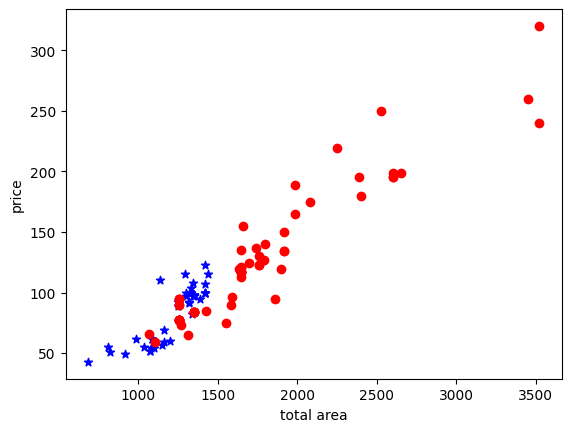

In [72]:
scatter_plot(df2,"Hebbal")

In [73]:
def remove_outlier_in_bhk(df):
    exclude_index=np.array([])
    for location ,location_df in df.groupby("location"):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby("bhk"):
            bhk_stats[bhk]={
                "mean":np.mean(bhk_df.price_per_sqft),
                "std":np.std(bhk_df.price_per_sqft),
                "count":bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby("bhk"):
            stats=bhk_stats.get(bhk-1)
            if stats and stats["count"]>5:
                exclude_index=np.append(exclude_index,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_index,axis="index")
                

df3=remove_outlier_in_bhk(df2)

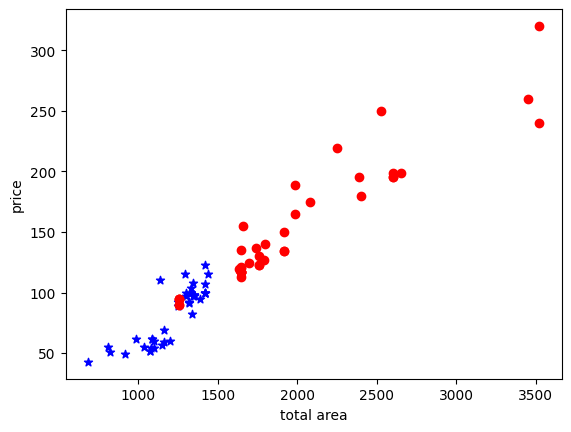

In [74]:
scatter_plot(df3,"Hebbal")

In [75]:
df3.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [76]:
df3[df3.bath>10]

,location,bath,price,bhk,total area,price_per_sqft
5277,Neeladri Nagar,12.0,160.0,10,4000.0,4000.000000
8486,other,12.0,525.0,10,12000.0,4375.000000
8575,other,16.0,550.0,16,10000.0,5500.000000
9308,other,12.0,150.0,11,6000.0,2500.000000
9639,other,13.0,275.0,13,5425.0,5069.124424


In [77]:
df3[df3.bath>df3.bhk+2]

,location,bath,price,bhk,total area,price_per_sqft
1626,Chikkabanavar,7.0,80.0,4,2460.0,3252.032520
5238,Nagasandra,8.0,450.0,4,7000.0,6428.571429
6711,Thanisandra,6.0,116.0,3,1806.0,6423.034330
8411,other,9.0,1000.0,6,11338.0,8819.897689


In [78]:
df4=df3[df3.bath<df3.bhk+2]
df4.shape

(7251, 6)

MODEL BUILDING

In [79]:
dummies=pd.get_dummies(df4['location'],dtype="int")
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [80]:
df5=pd.concat([df4,dummies],axis='columns')
df5

,location,bath,price,bhk,total area,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1st Block Jayanagar,4.0,428.0,4,2850.0,15017.543860,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,3.0,194.0,3,1630.0,11901.840491,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,2.0,235.0,3,1875.0,12533.333333,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,2.0,130.0,3,1200.0,10833.333333,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,2.0,148.0,2,1235.0,11983.805668,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,other,2.0,70.0,2,1200.0,5833.333333,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10233,other,1.0,200.0,1,1800.0,11111.111111,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10236,other,2.0,110.0,2,1353.0,8130.081301,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,other,1.0,26.0,1,812.0,3201.970443,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [81]:
df5.drop(columns=['location','price_per_sqft'],inplace=True)

In [94]:
x=df5.drop(columns=['price'],axis='columns')
y=df5['price']
x

,bath,bhk,total area,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,4.0,4,2850.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3,1630.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,3,1875.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,3,1200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2,1235.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,2.0,2,1200.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10233,1.0,1,1800.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10236,2.0,2,1353.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,1.0,1,812.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [128]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)


0.8193975609639608

In [129]:
x.columns

Index(['bath', 'bhk', 'total area', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vishveshwarya Layout', 'Vishwapriya Layout', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'other'],
      dtype='object', length=245)

In [130]:
np.where(x.columns=="Yeshwanthpur")[0][0]

243

PREDCTION

In [138]:
def price_predict(location,bath,bhk,sqft,y):
    loc_index=np.where(y.columns==location)[0][0]

    x=np.zeros(len(y.columns))
    x[2]=sqft
    x[0]=bath 
    x[1]=bhk
    if loc_index >=0:
        x[loc_index]=1
    return model.predict([x])[0]

In [139]:
price_predict("Yeshwanthpur",4,2,1000,x)

c:\Users\dhruv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


60.977179459060096

In [ ]:
import pickle
with open ("banglore_home_prices_model.pickle","wb") as f:
    pickle.dump(model,f)

In [ ]:
import json
columns={
    'data_columns':[col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))